In [2]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point, Polygon
%matplotlib inline

In [3]:
states = gpd.read_file('states/tl_2017_us_state.shp')
powerplants = pd.read_csv('powerplants/powerplants.csv', sep=';')

In [5]:
# Prepare states dataset
states = states[(states['NAME'] != 'Guam') & (states['NAME'] != 'United States Virgin Islands') & (states['NAME'] != 'American Samoa') & (states['NAME'] != 'United States Virgin Islands') & (states['NAME'] != 'Commonwealth of the Northern Mariana Islands')]
states = states[(states['NAME'] != 'Alaska') & (states['NAME'] != 'Hawaii') & (states['NAME'] != 'Puerto Rico')]
states = states.to_crs(epsg=5071)

(-2592850.698932405, 2495054.614420507, 113154.05293371654, 3323342.705082598)

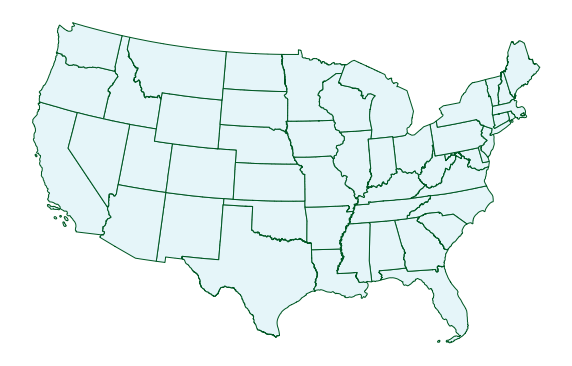

In [6]:
ax = states.plot(figsize=(10, 10), color='#e5f5f9', edgecolor='#005824')
ax.axis('off')

In [7]:
# Prepare powerplants datasets
points = powerplants.apply(lambda row: Point(row['Longitude'], row['Latitude']), axis=1)
points.crs = 'epsg:4326'
powerplants = gpd.GeoDataFrame(powerplants, geometry=points)
powerplants = powerplants[(powerplants['StateName'] != 'Guam') & (powerplants['StateName'] != 'United States Virgin Islands') & (powerplants['StateName'] != 'American Samoa') & (powerplants['StateName'] != 'United States Virgin Islands') & (powerplants['StateName'] != 'Commonwealth of the Northern Mariana Islands')]
powerplants = powerplants[(powerplants['StateName'] != 'Alaska') & (powerplants['StateName'] != 'Hawaii') & (powerplants['StateName'] != 'Puerto Rico')]
powerplants = powerplants.to_crs(epsg=5071)


(-2555362.0643735346,
 2444959.8431919673,
 136388.7153092972,
 3298302.1647903733)

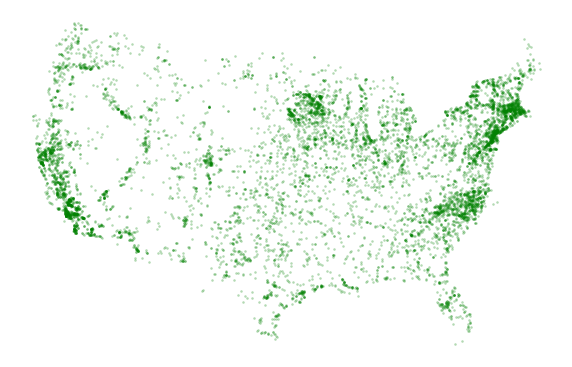

In [10]:
ax = powerplants.plot(figsize=(10, 10), color='green', markersize=3, alpha=0.2)
ax.axis('off')